In [121]:
# Librerías para el tratamiento y operación de los datos
import numpy as np
import pandas as pd
import math
# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Librería para el análisis de los datos nulos
import missingno as msno
# Librería con funciones del sistema operativo
import os

In [122]:
plt.style.use('ggplot')

In [123]:
# Se obtienen todos los csvs
main_path = 'NDVI_Fuera_SA-2'
files = os.listdir(main_path)

In [124]:
files

['ENCINAR-ST_NDVI_F.csv',
 'MATSUB-ST_NDVI_F.csv',
 'MATXERO-ST_NDVI_F.csv',
 'MEZQUITAL-ST_NDVI_F.csv',
 'PASTINDU-ST_NDVI_F.csv',
 'PASTIZAL-ST_NDVI_F.csv',
 'VEGARRO-ST_NDVI_F.csv']

In [125]:
file_path = os.path.join(main_path, files[0])
data_0 = pd.read_csv(file_path, encoding= 'utf-8')
data_0.head()

,Unnamed: 0,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,...,27-jul..5,12-ago..5,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5
0,2.0,3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,...,6943.0,6155.0,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0
1,3.0,3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,...,7291.0,6519.0,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0
2,4.0,2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,...,7132.0,6418.0,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0
3,5.0,3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,...,8129.0,7114.0,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0
4,6.0,2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,...,7025.0,6591.0,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0


In [126]:
# Se ejecutan en un ciclo for la importación de los datos
data_df = pd.DataFrame()
file_list = []
shape_list = []

for file in files:
    if file.find('csv') != -1:
        file_list.append(file)
        file_data = os.path.join(main_path, file)
        df_new = pd.read_csv(file_data,
                            sep = ',',
                            index_col= None,
                            encoding= 'utf-8')
        
        df_new['CAT'] = len(df_new)*[file.strip('.csv')]
    
        data_df = pd.concat([data_df, df_new], axis = 0)

In [127]:
data_df.head()

,Unnamed: 0,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,...,12-ago..5,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,CAT
0,2.0,3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,...,6155.0,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F
1,3.0,3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,...,6519.0,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F
2,4.0,2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,...,6418.0,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F
3,5.0,3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,...,7114.0,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F
4,6.0,2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,...,6591.0,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F


In [128]:
data_df.tail()

,Unnamed: 0,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,...,12-ago..5,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,CAT
27,30.0,2842.000000,3045.0,2847.000000,2872.000000,2566.000000,2567.000000,2461.000000,2453.000000,6712.0,...,5783.000000,6741.000000,5337.000000,4568.000000,4042.0,3743.000000,3693.000000,3587.000000,3500.0,VEGARRO-ST_NDVI_F
28,31.0,3157.000000,3803.0,3577.000000,3371.000000,3453.000000,2926.000000,3296.000000,5553.000000,7626.0,...,6044.000000,7412.000000,5822.000000,4904.000000,4776.0,4399.000000,4151.000000,4245.000000,4250.0,VEGARRO-ST_NDVI_F
29,32.0,3922.000000,3935.0,3346.000000,3280.000000,3057.000000,3039.000000,3386.000000,5758.000000,8007.0,...,6329.000000,7443.000000,5840.000000,4912.000000,4395.0,4039.000000,3924.000000,4129.000000,3956.0,VEGARRO-ST_NDVI_F
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VEGARRO-ST_NDVI_F
31,NaN,2979.966667,3295.9,3208.133333,2905.733333,2752.533333,2656.733333,2794.333333,4143.833333,6783.2,...,6349.866667,7227.566667,6006.033333,5061.133333,4596.8,4349.233333,4145.133333,4178.466667,4127.9,VEGARRO-ST_NDVI_F


## Información del DataFrame

In [129]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 31
Columns: 482 entries, Unnamed: 0 to CAT
dtypes: float64(481), object(1)
memory usage: 1.2+ MB


## Nombre de las columnas

In [130]:
data_df.columns.values.tolist()

['Unnamed: 0',
 '18-feb.',
 '5-mar.',
 '21-mar.',
 '6-abr.',
 '22-abr.',
 '8-may.',
 '24-may.',
 '9-jun.',
 '25-jun.',
 '11-jul.',
 '27-jul.',
 '12-ago.',
 '28-ago.',
 '13-sep.',
 '29-sep.',
 '15-oct.',
 '31-oct.',
 '16-nov.',
 '2-dic.',
 '18-dic.',
 '1-ene.',
 '16-ene.',
 '2-feb.',
 '18-feb..1',
 '6-mar.',
 '22-mar.',
 '7-abr.',
 '23-abr.',
 '9-may.',
 '25-may.',
 '10-jun.',
 '26-jun.',
 '12-jul.',
 '28-jul.',
 '13-ago.',
 '29-ago.',
 '14-sep.',
 '30-sep.',
 '16-oct.',
 '1-nov.',
 '17-nov.',
 '3-dic.',
 '19-dic.',
 '1-ene..1',
 '16-ene..1',
 '2-feb..1',
 '18-feb..2',
 '6-mar..1',
 '22-mar..1',
 '7-abr..1',
 '23-abr..1',
 '9-may..1',
 '25-may..1',
 '10-jun..1',
 '26-jun..1',
 '12-jul..1',
 '28-jul..1',
 '13-ago..1',
 '29-ago..1',
 '14-sep..1',
 '30-sep..1',
 '16-oct..1',
 '1-nov..1',
 '17-nov..1',
 '3-dic..1',
 '19-dic..1',
 '1-ene..2',
 '16-ene..2',
 '2-feb..2',
 '18-feb..3',
 '6-mar..2',
 '22-mar..2',
 '7-abr..2',
 '23-abr..2',
 '9-may..2',
 '25-may..2',
 '10-jun..2',
 '26-jun..2',
 

In [131]:
(data_df.columns.value_counts(ascending= True) == 1).all()

True

In [132]:
CAT = data_df['CAT'].unique().tolist()
CAT

['ENCINAR-ST_NDVI_F',
 'MATSUB-ST_NDVI_F',
 'MATXERO-ST_NDVI_F',
 'MEZQUITAL-ST_NDVI_F',
 'PASTINDU-ST_NDVI_F',
 'PASTIZAL-ST_NDVI_F',
 'VEGARRO-ST_NDVI_F']

## Revisión datos nulos (NaN)

In [133]:
data_null = data_df.isnull().sum(axis = 0).sort_values(ascending = True)

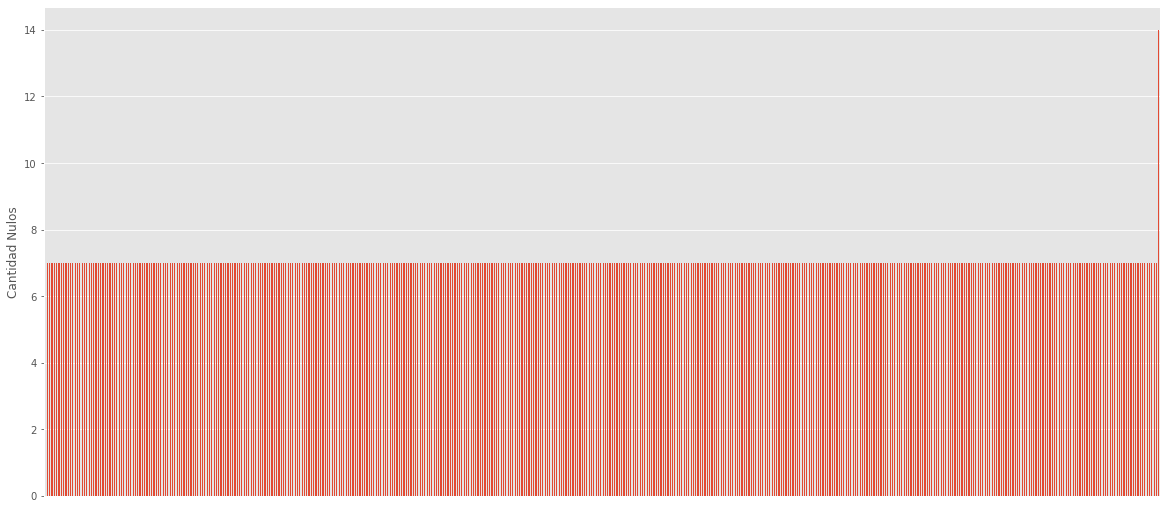

In [134]:
fig_null, ax_null = plt.subplots(nrows=1, ncols = 1, figsize = (20,9))
data_null.plot(kind = 'bar', 
               ax = ax_null)
ax_null.xaxis.set_visible(False)
#ax_null.set_xlabel('Columnas')
ax_null.set_ylabel('Cantidad Nulos')
plt.show()

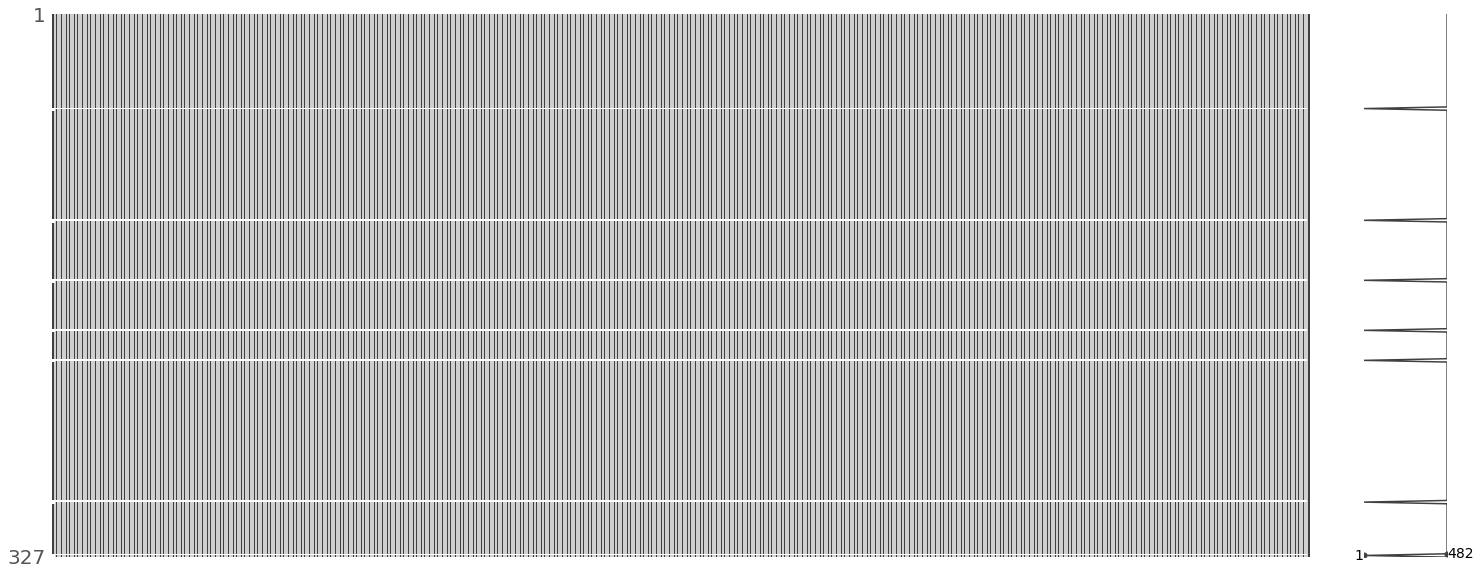

In [135]:
ax_msno = msno.matrix(data_df)
plt.show()

In [136]:
# Se eliminan datos nulos 
data_df.dropna(how = 'any', inplace = True)

In [137]:
data_df_2 = data_df.copy()
data_df_2.loc[:,'XY'] = data_df_2[['Unnamed: 0']].apply(lambda s: tuple(s), axis = 1)

In [138]:
data_df_2.drop(columns=['Unnamed: 0'], inplace = True)

In [139]:
data_df_2.head()

,18-feb.,5-mar.,21-mar.,6-abr.,22-abr.,8-may.,24-may.,9-jun.,25-jun.,11-jul.,...,28-ago..5,13-sep..5,29-sep..5,15-oct..5,31-oct..5,16-nov..5,2-dic..5,18-dic..5,CAT,XY
0,3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,5458.0,...,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F,"(2.0,)"
1,3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,5946.0,...,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F,"(3.0,)"
2,2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,6937.0,...,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F,"(4.0,)"
3,3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,7160.0,...,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F,"(5.0,)"
4,2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,6984.0,...,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F,"(6.0,)"


In [140]:
list_fechas = data_df_2.columns[:-2].values.tolist()

In [141]:
list_fechas

['18-feb.',
 '5-mar.',
 '21-mar.',
 '6-abr.',
 '22-abr.',
 '8-may.',
 '24-may.',
 '9-jun.',
 '25-jun.',
 '11-jul.',
 '27-jul.',
 '12-ago.',
 '28-ago.',
 '13-sep.',
 '29-sep.',
 '15-oct.',
 '31-oct.',
 '16-nov.',
 '2-dic.',
 '18-dic.',
 '1-ene.',
 '16-ene.',
 '2-feb.',
 '18-feb..1',
 '6-mar.',
 '22-mar.',
 '7-abr.',
 '23-abr.',
 '9-may.',
 '25-may.',
 '10-jun.',
 '26-jun.',
 '12-jul.',
 '28-jul.',
 '13-ago.',
 '29-ago.',
 '14-sep.',
 '30-sep.',
 '16-oct.',
 '1-nov.',
 '17-nov.',
 '3-dic.',
 '19-dic.',
 '1-ene..1',
 '16-ene..1',
 '2-feb..1',
 '18-feb..2',
 '6-mar..1',
 '22-mar..1',
 '7-abr..1',
 '23-abr..1',
 '9-may..1',
 '25-may..1',
 '10-jun..1',
 '26-jun..1',
 '12-jul..1',
 '28-jul..1',
 '13-ago..1',
 '29-ago..1',
 '14-sep..1',
 '30-sep..1',
 '16-oct..1',
 '1-nov..1',
 '17-nov..1',
 '3-dic..1',
 '19-dic..1',
 '1-ene..2',
 '16-ene..2',
 '2-feb..2',
 '18-feb..3',
 '6-mar..2',
 '22-mar..2',
 '7-abr..2',
 '23-abr..2',
 '9-may..2',
 '25-may..2',
 '10-jun..2',
 '26-jun..2',
 '12-jul..2',
 '

In [142]:
#Diccionaro fechas
dict_fechas = {'ene':'01',
               'feb':'02',
               'mar':'03',
               'abr':'04',
               'may':'05',
               'jun':'06',
               'jul':'07',
               'ago':'08',
               'sep':'09',
               'oct':'10',
               'nov':'11',
               'dic':'12'}
# Formato fechas 
fecha_format = []
year = 2000
num_mes_ini = 1
for fecha in list_fechas:
    mes = fecha.split('.')[0].split('-')[1]
    num_mes = float(dict_fechas[mes].split('.')[0])
    if num_mes < num_mes_ini:
        year += 1
    
    fecha_format.append(fecha.replace(mes, dict_fechas[mes]).split('.')[0] + '-' + str(year))
    num_mes_ini = num_mes

date_time = pd.to_datetime(fecha_format, format = '%d-%m-%Y')

In [143]:
date_time

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2020-07-27', '2020-08-12', '2020-08-28', '2020-09-13',
               '2020-09-29', '2020-10-15', '2020-10-31', '2020-11-16',
               '2020-12-02', '2020-12-18'],
              dtype='datetime64[ns]', length=480, freq=None)

In [144]:
len(fecha_format), len(list_fechas)

(480, 480)

In [145]:
rename_col_fecha = dict(zip(list_fechas, fecha_format))

In [146]:
data_df_2.rename(columns= rename_col_fecha, inplace = True)

In [147]:
data_df_2.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,CAT,XY
0,3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,5458.0,...,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F,"(2.0,)"
1,3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,5946.0,...,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F,"(3.0,)"
2,2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,6937.0,...,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F,"(4.0,)"
3,3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,7160.0,...,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F,"(5.0,)"
4,2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,6984.0,...,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F,"(6.0,)"


In [149]:
data_df_3 = data_df_2.copy()
data_df_4 = data_df_3.set_index('XY')
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,12-08-2020,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,CAT
XY,,,,,,,,,,,,,,,,,,,,,
"(2.0,)",3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,5458.0,...,6155.0,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F
"(3.0,)",3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,5946.0,...,6519.0,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F
"(4.0,)",2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,6937.0,...,6418.0,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F
"(5.0,)",3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,7160.0,...,7114.0,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F
"(6.0,)",2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,6984.0,...,6591.0,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F


In [150]:
#list_posxy = data_df_4.index.values.tolist()

In [151]:
#rename_index = {index : 'posXY_'+str(i) for i, index in enumerate(list_posxy)}

In [93]:
#data_df_4.rename(index = rename_index, inplace = True)
data_df_4.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,12-08-2020,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,CAT
XY,,,,,,,,,,,,,,,,,,,,,
"(2.0,)",3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,5458.0,...,6155.0,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F
"(3.0,)",3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,5946.0,...,6519.0,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F
"(4.0,)",2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,6937.0,...,6418.0,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F
"(5.0,)",3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,7160.0,...,7114.0,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F
"(6.0,)",2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,6984.0,...,6591.0,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F


In [94]:
data_df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, (2.0,) to (32.0,)
Columns: 481 entries, 18-02-2000 to CAT
dtypes: float64(480), object(1)
memory usage: 1.2+ MB


## Agrupamientos

In [95]:
data_group = data_df_4.groupby('CAT')

In [96]:
data_group.agg([np.median, np.std])

18-02-2000             5-03-2000             21-03-2000  \
                        median         std    median         std     median   
CAT                                                                           
ENCINAR-ST_NDVI_F       3510.0  461.842371    3665.0  446.409246     3314.0   
MATSUB-ST_NDVI_F        2935.0  290.935400    3202.0  276.570748     3143.0   
MATXERO-ST_NDVI_F       2266.0  225.801494    2401.0  305.181862     2364.0   
MEZQUITAL-ST_NDVI_F     2314.5  210.430222    2481.5  256.155095     2400.0   
PASTINDU-ST_NDVI_F      2477.0  138.107190    2555.0  185.206506     2529.5   
PASTIZAL-ST_NDVI_F      2605.0  232.535823    2760.0  225.009505     2582.0   
VEGARRO-ST_NDVI_F       2924.0  308.884029    3255.0  377.508287     3232.0   

                                6-04-2000             22-04-2000              \
                            std    median         std     median         std   
CAT                                                                            
ENCINAR-ST_NDVI_F    367.279962    2895.0  201.911231     2592.0  163.959320   
MATSUB-ST_NDVI_F     240.942284    2902.0  218.371136     2698.0  193.691110   
MATXERO-ST_NDVI_F    263.341093    2203.5  262.431027     2049.5  304.385751   
MEZQUITAL-ST_NDVI_F  189.779610    2281.0  189.127893     2122.0  187.085316   
PASTINDU-ST_NDVI_F   155.322031    2331.0  165.182677     2266.0  171.485653   
PASTIZAL-ST_NDVI_F   210.914073    2379.0  165.755264     2234.0  163.865940   
VEGARRO-ST_NDVI_F    286.012989    2873.0  217.484194     2749.5  228.579683   

                     ... 15-10-2020             31-10-2020              \
                     ...     median         std     median         std   
CAT                  ...                                                 
ENCINAR-ST_NDVI_F    ...     4730.0  508.393564     4632.0  563.607702   
MATSUB-ST_NDVI_F     ...     4381.0  306.430879     4112.0  276.907688   
MATXERO-ST_NDVI_F    ...     3743.5  464.847388     3600.5  463.592509   
MEZQUITAL-ST_NDVI_F  ...     3605.0  351.025889     3356.0  370.824655   
PASTINDU-ST_NDVI_F   ...     3485.0  160.987771     3357.0   94.462669   
PASTIZAL-ST_NDVI_F   ...     4032.0  317.207191     3863.0  330.420247   
VEGARRO-ST_NDVI_F    ...     4646.5  412.554565     4442.0  408.049919   

                    16-11-2020             2-12-2020             18-12-2020  \
                        median         std    median         std     median   
CAT                                                                           
ENCINAR-ST_NDVI_F       4349.0  467.955490    4437.0  505.226904     4348.0   
MATSUB-ST_NDVI_F        3851.0  269.031056    3956.0  276.738805     3926.0   
MATXERO-ST_NDVI_F       3313.0  431.216512    3484.0  415.509194     3510.0   
MEZQUITAL-ST_NDVI_F     3135.0  367.653152    3128.0  363.100091     3155.5   
PASTINDU-ST_NDVI_F      3086.0  151.181789    3224.0  142.211682     3218.0   
PASTIZAL-ST_NDVI_F      3691.0  278.496651    3674.0  310.196860     3588.0   
VEGARRO-ST_NDVI_F       4196.0  388.696560    4217.0  398.347512     4224.0   

                                 
                            std  
CAT                              
ENCINAR-ST_NDVI_F    503.447667  
MATSUB-ST_NDVI_F     279.242982  
MATXERO-ST_NDVI_F    442.733456  
MEZQUITAL-ST_NDVI_F  332.118459  
PASTINDU-ST_NDVI_F   143.319442  
PASTIZAL-ST_NDVI_F   325.679953  
VEGARRO-ST_NDVI_F    371.629715  

[7 rows x 960 columns]

In [97]:
describe_data_group = data_group.agg([np.median, np.std]).T
describe_data_group.head()

CAT                ENCINAR-ST_NDVI_F  MATSUB-ST_NDVI_F  MATXERO-ST_NDVI_F  \
18-02-2000 median        3510.000000       2935.000000        2266.000000   
           std            461.842371        290.935400         225.801494   
5-03-2000  median        3665.000000       3202.000000        2401.000000   
           std            446.409246        276.570748         305.181862   
21-03-2000 median        3314.000000       3143.000000        2364.000000   

CAT                MEZQUITAL-ST_NDVI_F  PASTINDU-ST_NDVI_F  \
18-02-2000 median          2314.500000         2477.000000   
           std              210.430222          138.107190   
5-03-2000  median          2481.500000         2555.000000   
           std              256.155095          185.206506   
21-03-2000 median          2400.000000         2529.500000   

CAT                PASTIZAL-ST_NDVI_F  VEGARRO-ST_NDVI_F  
18-02-2000 median         2605.000000        2924.000000  
           std             232.535823         308.884029  
5-03-2000  median         2760.000000        3255.000000  
           std             225.009505         377.508287  
21-03-2000 median         2582.000000        3232.000000

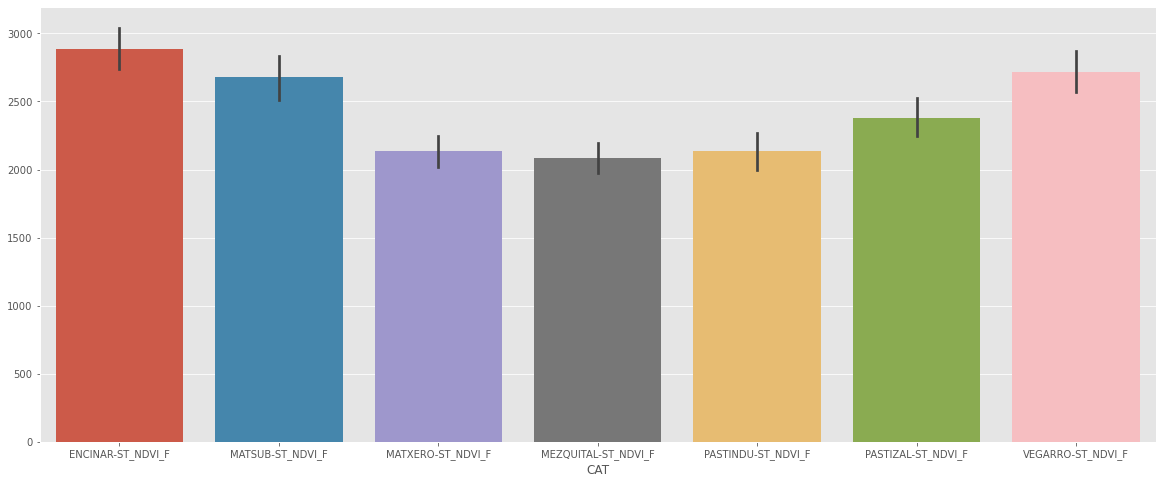

In [98]:
fig_group, ax_group = plt.subplots(nrows = 1, ncols = 1, figsize = (20,8))
sns.barplot(data = describe_data_group, ax = ax_group)
plt.show()

In [100]:
ENCINAR_df = data_group.get_group('ENCINAR-ST_NDVI_F')
ENCINAR_df.head()

,18-02-2000,5-03-2000,21-03-2000,6-04-2000,22-04-2000,8-05-2000,24-05-2000,9-06-2000,25-06-2000,11-07-2000,...,12-08-2020,28-08-2020,13-09-2020,29-09-2020,15-10-2020,31-10-2020,16-11-2020,2-12-2020,18-12-2020,CAT
XY,,,,,,,,,,,,,,,,,,,,,
"(2.0,)",3118.0,3335.0,3251.0,2764.0,2503.0,2510.0,2690.0,3073.0,5987.0,5458.0,...,6155.0,7131.0,5870.0,5079.0,4651.0,4455.0,4275.0,4296.0,4206.0,ENCINAR-ST_NDVI_F
"(3.0,)",3093.0,3447.0,3087.0,2559.0,2524.0,2387.0,2544.0,2578.0,4986.0,5946.0,...,6519.0,7207.0,6544.0,5694.0,5269.0,4967.0,4703.0,4928.0,4783.0,ENCINAR-ST_NDVI_F
"(4.0,)",2955.0,3724.0,3233.0,2899.0,2413.0,2410.0,2665.0,3159.0,6509.0,6937.0,...,6418.0,7297.0,6729.0,5851.0,5222.0,4878.0,4513.0,4622.0,4459.0,ENCINAR-ST_NDVI_F
"(5.0,)",3075.0,4117.0,3563.0,3449.0,2684.0,2436.0,2787.0,3931.0,6844.0,7160.0,...,7114.0,7802.0,7261.0,5888.0,5235.0,4869.0,4624.0,4760.0,4633.0,ENCINAR-ST_NDVI_F
"(6.0,)",2573.0,3125.0,3025.0,2589.0,2521.0,2437.0,2692.0,3307.0,6459.0,6984.0,...,6591.0,7476.0,7105.0,5845.0,5199.0,4804.0,4182.0,4365.0,4402.0,ENCINAR-ST_NDVI_F


In [101]:
ENCINAR_df_2 = ENCINAR_df.copy()

In [102]:
ENCINAR_df_3 = ENCINAR_df_2.iloc[:,:-1].transpose()
ENCINAR_df_3.head()

XY,"(2.0,)","(3.0,)","(4.0,)","(5.0,)","(6.0,)","(7.0,)","(9.0,)","(10.0,)","(11.0,)","(12.0,)",...,"(51.0,)","(52.0,)","(53.0,)","(54.0,)","(55.0,)","(56.0,)","(57.0,)","(58.0,)","(59.0,)","(60.0,)"
18-02-2000,3118.0,3093.0,2955.0,3075.0,2573.0,2748.0,2888.0,2759.0,3142.0,2938.0,...,3223.0,4278.0,3198.0,3600.0,4196.0,3620.0,3778.0,3916.0,3689.0,3668.0
5-03-2000,3335.0,3447.0,3724.0,4117.0,3125.0,3784.0,3315.0,3523.0,3513.0,3219.0,...,3345.0,4170.0,3286.0,3824.0,3989.0,3586.0,3424.0,4244.0,3697.0,3665.0
21-03-2000,3251.0,3087.0,3233.0,3563.0,3025.0,3542.0,3344.0,2938.0,3247.0,3456.0,...,3463.0,3833.0,2773.0,3517.0,3321.0,3191.0,3248.0,3895.0,3132.0,3096.0
6-04-2000,2764.0,2559.0,2899.0,3449.0,2589.0,2935.0,3024.0,2743.0,2930.0,2830.0,...,2403.0,2924.0,2754.0,3047.0,3204.0,2963.0,2994.0,3256.0,2779.0,2813.0
22-04-2000,2503.0,2524.0,2413.0,2684.0,2521.0,2738.0,2642.0,2514.0,2688.0,2365.0,...,2249.0,2740.0,2399.0,2806.0,2675.0,2833.0,2831.0,2847.0,2820.0,2533.0


In [103]:
ENCINAR_df_3.rename_axis('Fecha', axis = 'index', inplace = True)
ENCINAR_df_3.head()

XY,"(2.0,)","(3.0,)","(4.0,)","(5.0,)","(6.0,)","(7.0,)","(9.0,)","(10.0,)","(11.0,)","(12.0,)",...,"(51.0,)","(52.0,)","(53.0,)","(54.0,)","(55.0,)","(56.0,)","(57.0,)","(58.0,)","(59.0,)","(60.0,)"
Fecha,,,,,,,,,,,,,,,,,,,,,
18-02-2000,3118.0,3093.0,2955.0,3075.0,2573.0,2748.0,2888.0,2759.0,3142.0,2938.0,...,3223.0,4278.0,3198.0,3600.0,4196.0,3620.0,3778.0,3916.0,3689.0,3668.0
5-03-2000,3335.0,3447.0,3724.0,4117.0,3125.0,3784.0,3315.0,3523.0,3513.0,3219.0,...,3345.0,4170.0,3286.0,3824.0,3989.0,3586.0,3424.0,4244.0,3697.0,3665.0
21-03-2000,3251.0,3087.0,3233.0,3563.0,3025.0,3542.0,3344.0,2938.0,3247.0,3456.0,...,3463.0,3833.0,2773.0,3517.0,3321.0,3191.0,3248.0,3895.0,3132.0,3096.0
6-04-2000,2764.0,2559.0,2899.0,3449.0,2589.0,2935.0,3024.0,2743.0,2930.0,2830.0,...,2403.0,2924.0,2754.0,3047.0,3204.0,2963.0,2994.0,3256.0,2779.0,2813.0
22-04-2000,2503.0,2524.0,2413.0,2684.0,2521.0,2738.0,2642.0,2514.0,2688.0,2365.0,...,2249.0,2740.0,2399.0,2806.0,2675.0,2833.0,2831.0,2847.0,2820.0,2533.0


In [104]:
ENCINAR_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 18-02-2000 to 18-12-2020
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   (2.0,)   480 non-null    float64
 1   (3.0,)   480 non-null    float64
 2   (4.0,)   480 non-null    float64
 3   (5.0,)   480 non-null    float64
 4   (6.0,)   480 non-null    float64
 5   (7.0,)   480 non-null    float64
 6   (9.0,)   480 non-null    float64
 7   (10.0,)  480 non-null    float64
 8   (11.0,)  480 non-null    float64
 9   (12.0,)  480 non-null    float64
 10  (13.0,)  480 non-null    float64
 11  (14.0,)  480 non-null    float64
 12  (15.0,)  480 non-null    float64
 13  (16.0,)  480 non-null    float64
 14  (17.0,)  480 non-null    float64
 15  (18.0,)  480 non-null    float64
 16  (19.0,)  480 non-null    float64
 17  (20.0,)  480 non-null    float64
 18  (21.0,)  480 non-null    float64
 19  (22.0,)  480 non-null    float64
 20  (23.0,)  480 non-null    float64
 21  (24.0

In [105]:
(ENCINAR_df_3.isnull().sum(axis = 0) == 0).all()

True

In [106]:
round(ENCINAR_df_3.describe(),2)

,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0,11.0,12.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
count,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,...,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00,480.00
mean,4727.18,5015.21,5567.41,5382.87,5058.17,5452.27,5110.64,4926.68,5122.27,4828.14,...,4894.00,5511.48,5003.19,5657.05,5798.45,5144.56,5220.50,5509.82,5044.33,4924.49
std,1362.86,1574.85,1689.72,1682.27,1668.77,1680.36,1647.01,1678.54,1408.87,1360.72,...,1483.62,1584.36,1478.69,1666.73,1683.73,1578.84,1538.62,1589.58,1209.30,1432.86
min,2376.00,2316.00,2209.00,2352.00,2320.00,2423.00,2361.00,2333.00,2351.00,2151.00,...,2129.00,2444.00,2267.00,2478.00,2406.00,2275.00,2472.00,2272.00,2614.00,2406.00
25%,3606.50,3719.00,4172.50,4085.75,3801.50,4162.00,3898.75,3657.00,4050.00,3757.50,...,3687.25,4273.50,3776.50,4366.00,4681.25,3802.25,3954.50,4430.25,4077.00,3800.25
50%,4781.50,5133.50,5834.50,5237.00,4871.50,5355.50,4873.00,4544.00,5373.50,5053.00,...,4866.00,5829.50,5079.50,5867.00,6087.00,4999.50,5123.00,5735.50,5091.50,4890.50
75%,5634.75,6283.75,6877.75,6674.00,6107.25,6740.75,6301.00,6142.00,6166.50,5903.00,...,6027.00,6719.25,6137.75,7021.00,7141.00,6404.75,6384.00,6731.50,6002.00,6036.25
max,7700.00,8089.00,8592.00,8772.00,8626.00,8749.00,9339.00,8588.00,7898.00,7695.00,...,8612.00,8583.00,8040.00,8506.00,8719.00,8470.00,8545.00,8606.00,8070.00,8121.00


In [107]:
ENCINAR_corr = ENCINAR_df_3.corr(method = 'pearson')

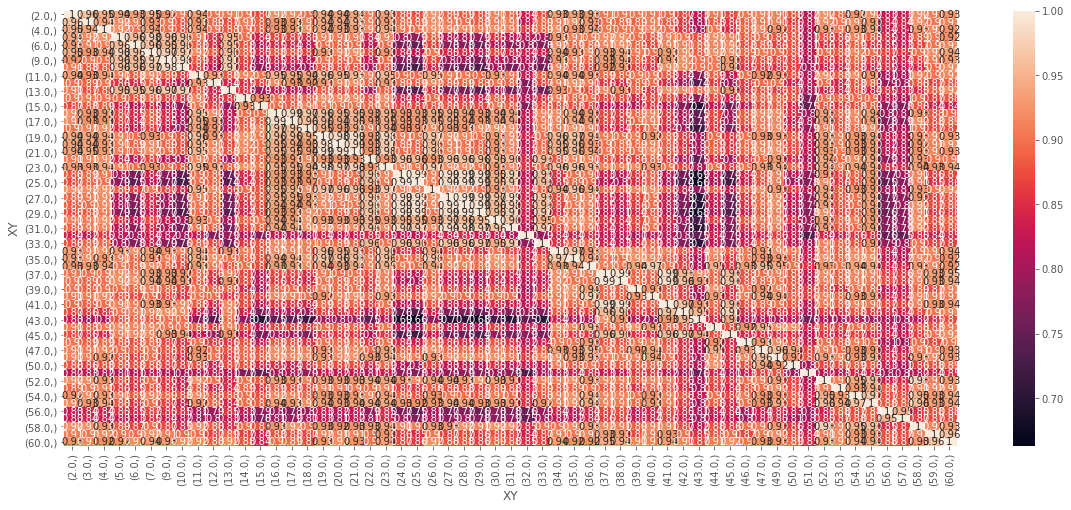

In [108]:
fig_corr, ax_corr = plt.subplots(nrows=1, ncols=1, figsize = (20,8))
sns.heatmap(ENCINAR_corr, annot=True, ax = ax_corr)
plt.show()

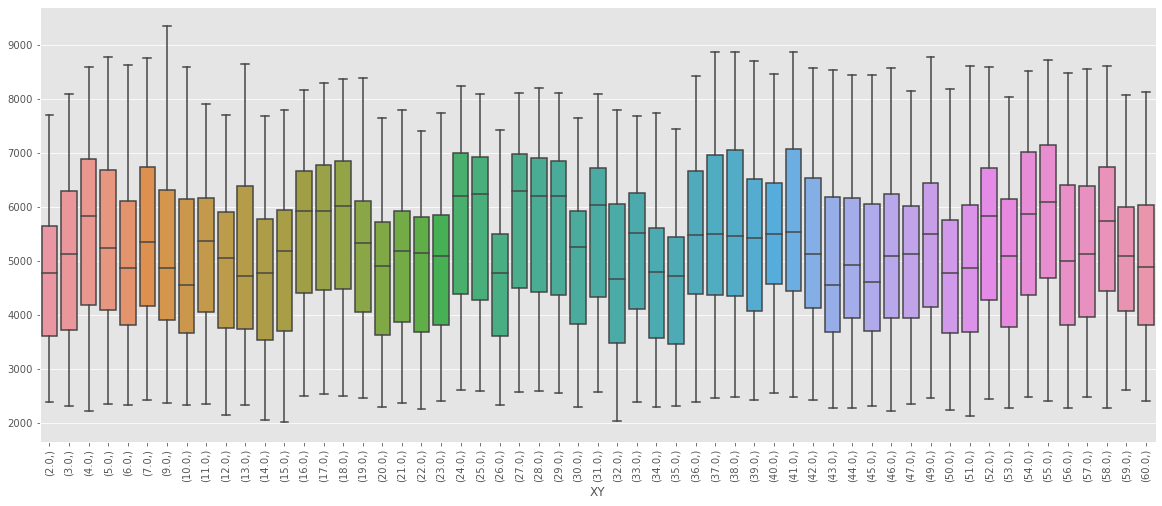

In [109]:
fig_box_E, ax_box_E = plt.subplots(nrows=1, ncols = 1, figsize= (20,8))
sns.boxplot(data = ENCINAR_df_3, ax = ax_box_E)
#plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [110]:
ENCINAR_df_3.index = date_time

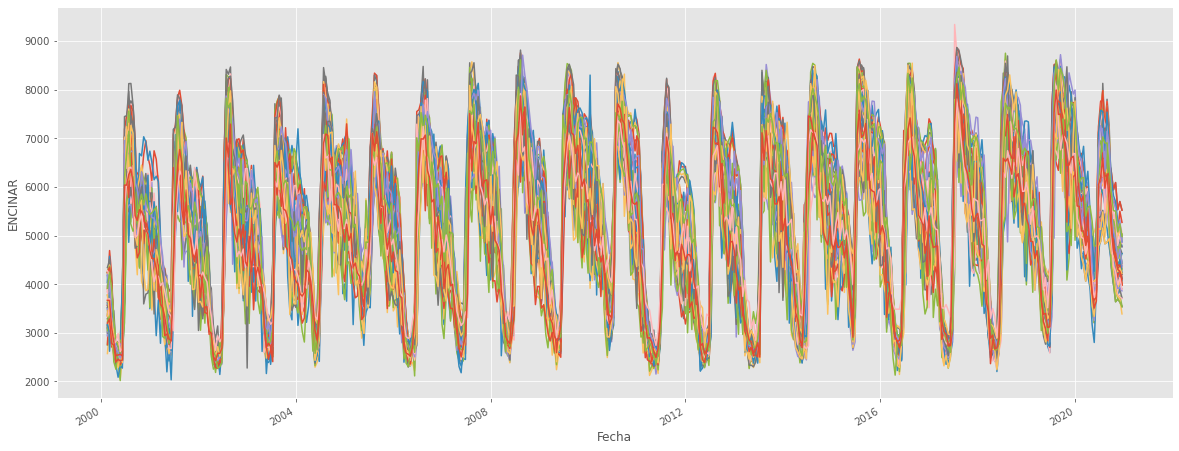

In [111]:
ax_trend = ENCINAR_df_3.plot(kind = 'line', 
                             subplots = False,
                             sharex = True,
                             figsize = (20,8),
                             legend = False)
ax_trend.set_xlabel('Fecha')
ax_trend.set_ylabel('ENCINAR')
plt.show()

## Tendencias por categoría

In [112]:
def ts_group(df_group, cat):
    list_df_group = []
    for element in cat:
        df_ = df_group.get_group(element)
        df_T = df_.iloc[:,:-1].transpose()
        df_T.rename_axis('Fecha', axis = 'index', inplace = True)
        list_df_group.append(df_T)
        
    return list_df_group
    

In [115]:
file_list

['ENCINAR-ST_NDVI_F.csv',
 'MATSUB-ST_NDVI_F.csv',
 'MATXERO-ST_NDVI_F.csv',
 'MEZQUITAL-ST_NDVI_F.csv',
 'PASTINDU-ST_NDVI_F.csv',
 'PASTIZAL-ST_NDVI_F.csv',
 'VEGARRO-ST_NDVI_F.csv']

In [116]:
list_groups = ts_group(data_group, CAT)

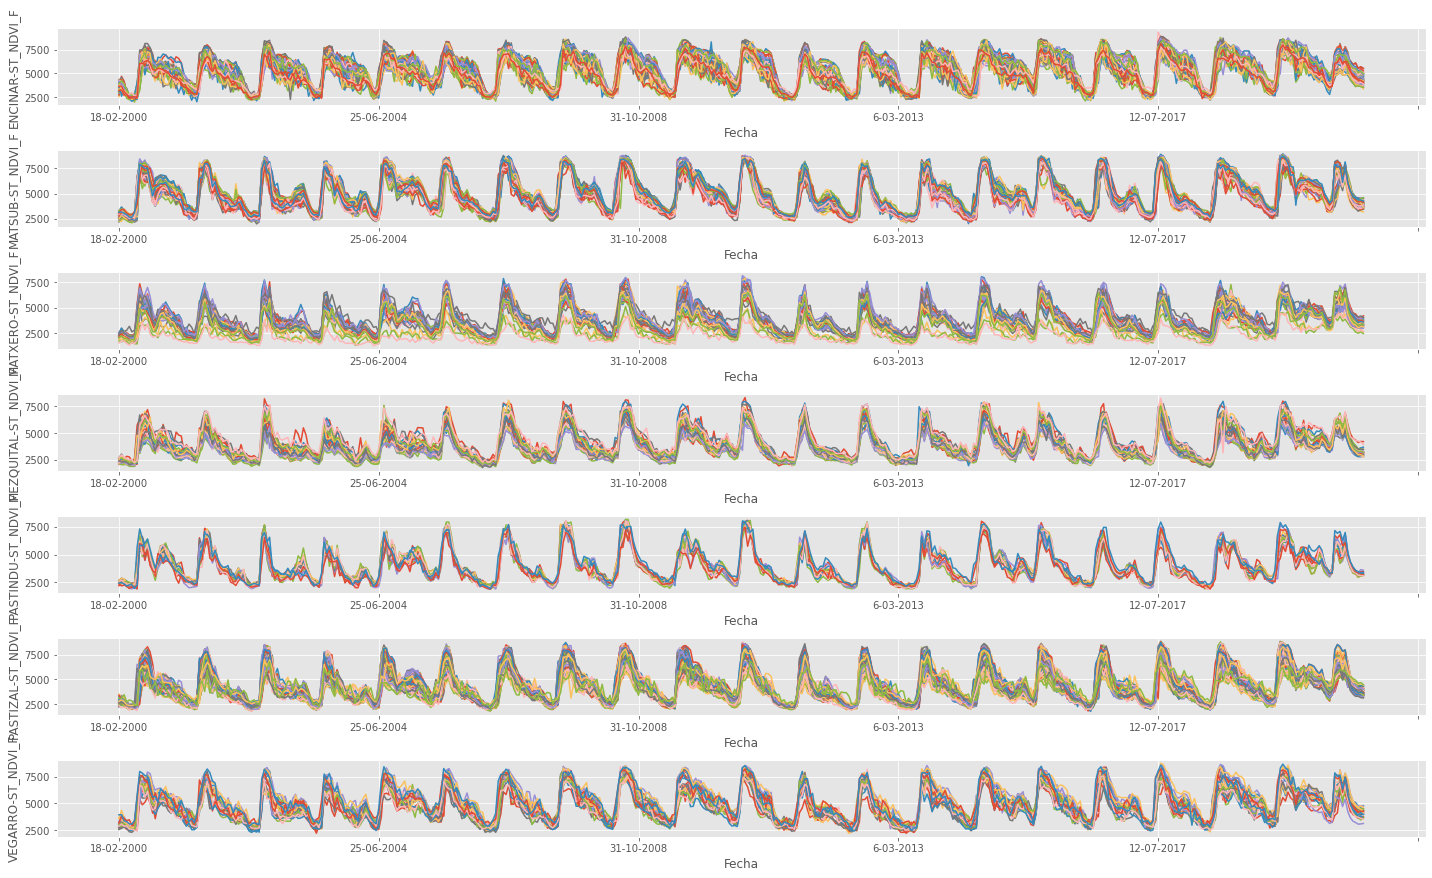

In [117]:
fig_groups, ax_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,12))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'line', 
                legend = False, 
                ax = ax_groups[k])
    ax_groups[k].set_xlabel('Fecha')
    ax_groups[k].set_ylabel(CAT[k])
plt.tight_layout()
plt.show()

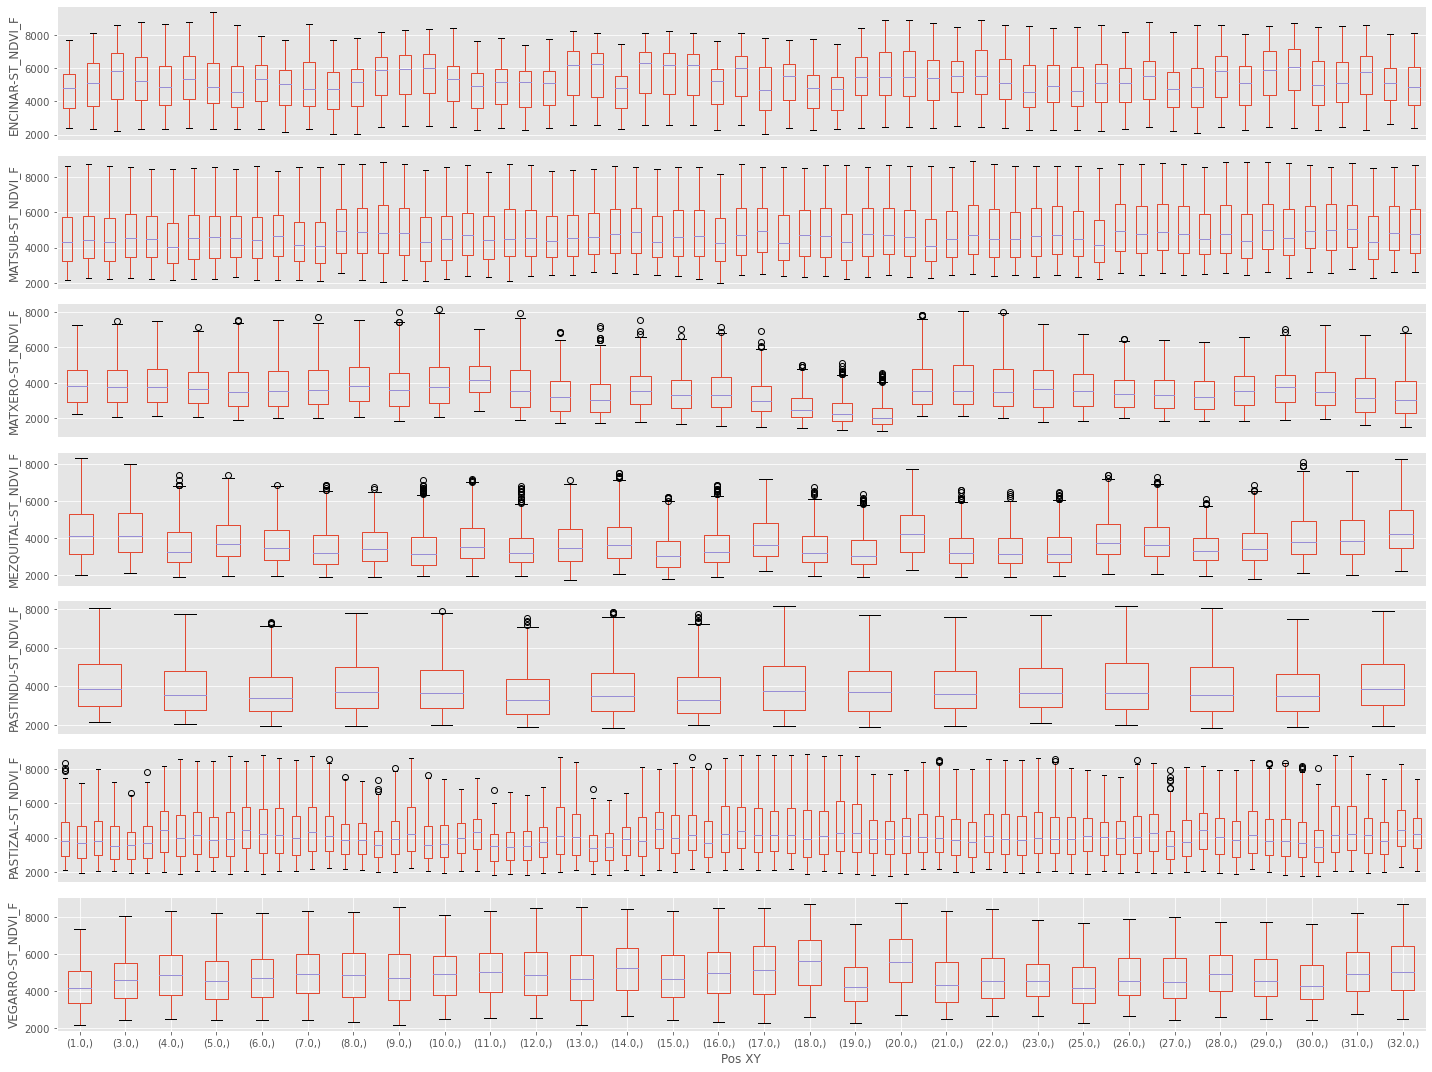

In [118]:
fig_box_groups, ax_box_groups = plt.subplots(nrows = len(CAT), ncols = 1, figsize = (20,15))
for k, df_cat in enumerate(list_groups):
    df_cat.plot(kind = 'box', 
                legend = False, 
                ax = ax_box_groups[k])
    if k == len(CAT)-1:
        ax_box_groups[k].set_xlabel('Pos XY')
    else:
        ax_box_groups[k].xaxis.set_visible(False)
    
    ax_box_groups[k].set_ylabel(CAT[k])

plt.tight_layout()
plt.show()